# PH_BANDS

Calculer la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from IPython.display import FileLink
from pymatgen.phonon.plotter import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with MPRester("rEVEIFsc61iExKZbJ2QyepniwSgJ1m6W") as m:
    st= m.get_phonon_bandstructure_by_material_id("mp-28554")

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## Structure de bandes des phonons

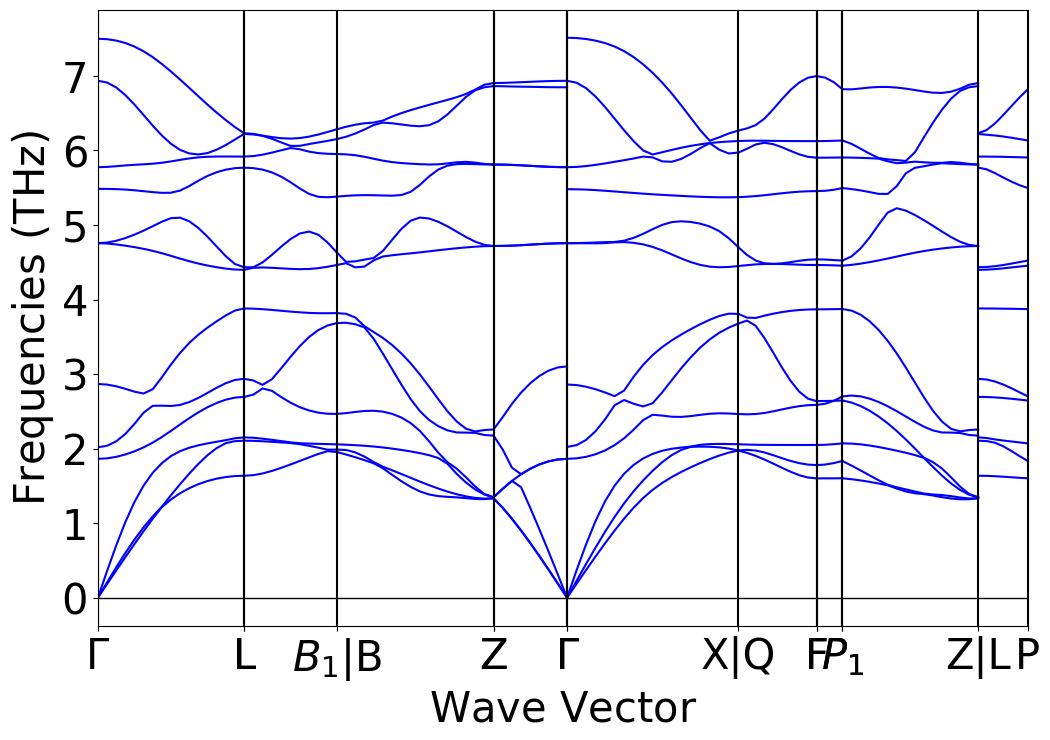

In [3]:
plotter = PhononBSPlotter(st)
plotter.show()

## La zone de Brillouin

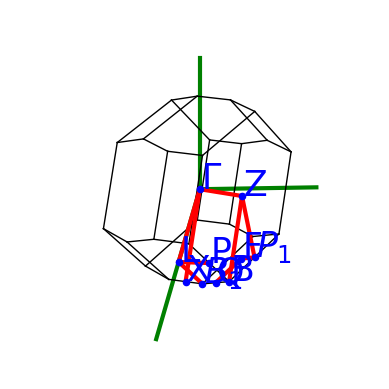

In [4]:
plotter.plot_brillouin()

## Vitesse du son

On va tout d'abord choisir 3 directions différentes de la zone de Brillouin. Ces directions peuvent être choisies de manière arbitraire. On prend alors : Direction 1 : X - W Direction 2 : W - K Direction 3 : K - Γ

On peut maintenant calculer les vitesses du son en prenant la dérivée de la relation de dispersion par rapport au vecteur d'onde q. On tombe alors sur la relation v = 2pi|df/dq|. Il est donc nécessaire de calculer le terme df/dq, qui vaut la pente du graphe. Il est important de considérer que nous sommes dans le cas de grandes longueurs d'ondes, c'est à dire λ >> a où a est le paramètre de maille.

La vitesse du son de la première courbe dans la direction X - W est 0.9227390413411966 m/s et la pente est affichée en rouge.
La vitesse du son de la quatrième courbe dans la direction K - Γ est 13.325372951665663 m/s et la pente est affichée en vert.
La vitesse du son de la troisième courbe dans la direction U - W vaut 0.46270879637896756 m/s et la pente est affichée en bleu.


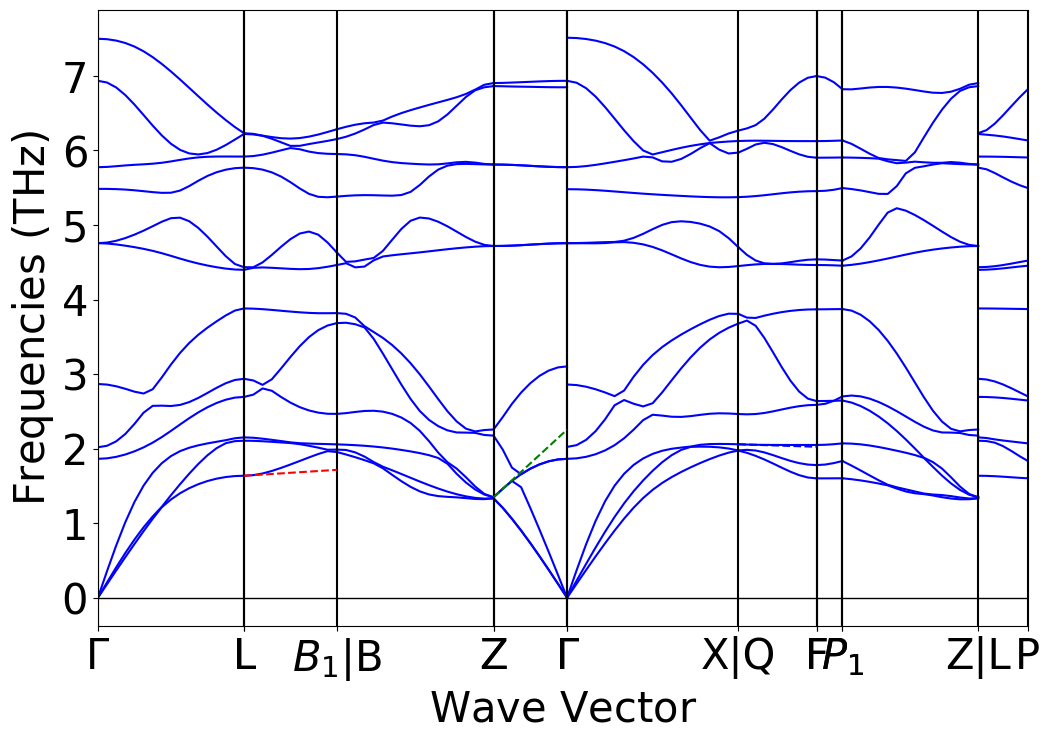

In [5]:
data = plotter.bs_plot_data()
d = data.get('distances')
f = data.get('frequency')

courbe1 = f[1][0]
courbe2 = f[3][3]
courbe3 = f[5][2]
d1 = d[1]
d2 = d[3]
d3 = d[5]

a1 = (courbe1[1]-courbe1[0])/(d1[1]-d1[0])
a2 = (courbe2[1]-courbe2[0])/(d2[1]-d2[0])
a3 = (courbe3[1]-courbe3[0])/(d3[1]-d3[0])

v1 = 2*np.pi*np.abs(a1)
v2 = 2*np.pi*np.abs(a2)
v3 = 2*np.pi*np.abs(a3)

x1 = np.linspace(d1[0],d1[-1],1000)
x2 = np.linspace(d2[0],d2[-1],1000)
x3 = np.linspace(d3[0],d3[-1],1000)

y1 = np.zeros(1000)
y2 = np.zeros(1000)
y3 = np.zeros(1000)

y1[0] = courbe1[0]
y2[0] = courbe2[0]
y3[0] = courbe3[0]

for i in range(1,1000):
    y1[i] = y1[0] + a1*(x1[i]-x1[0])
    y2[i] = y2[0] + a2*(x2[i]-x2[0])
    y3[i] = y3[0] + a3*(x3[i]-x3[0])
    
print("La vitesse du son de la première courbe dans la direction X - W est "+str(v1)+" m/s et la pente est affichée en rouge.")
print("La vitesse du son de la quatrième courbe dans la direction \u004B - \u0393 est "+str(v2)+" m/s et la pente est affichée en vert.")
print("La vitesse du son de la troisième courbe dans la direction U - W vaut "+str(v3)+" m/s et la pente est affichée en bleu.")

plotter.get_plot()
plt.plot(x1, y1, color='red', ls='--')
plt.plot(x2, y2, color='green', ls='--')
plt.plot(x3, y3, color='blue', ls='--')


plt.show()